In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [4]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [5]:
#Functions For plots

def plot_bar_chart(x_axis,y_axis,title="Bar Plot",xlabel="X Axis",ylabel="Y Axis",color="blue",figsize_=(10,5),rot_=0):
    #plt.bar(x_axis,y_axis,color=color)
    plt.figure(figsize=figsize_)
    sns.barplot(x=x_axis,y=y_axis,data=data)
    plt.title(title)
    plt.xticks(rotation=rot_)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

        

def plot_hist_chart(X_axis,hue_="PerformanceRating",titleH="Histplot",xlabelH="X axis",ylabelH="Y axis",figsizeH_=(10,5),rotH_=0):
    plt.figure(figsize=figsizeH_)
    sns.histplot(x=X_axis,hue=hue_,data=data)
    plt.title(titleH)
    plt.xticks(rotation=rotH_)
    plt.xlabel(xlabelH)
    plt.ylabel(ylabelH)
    plt.show()

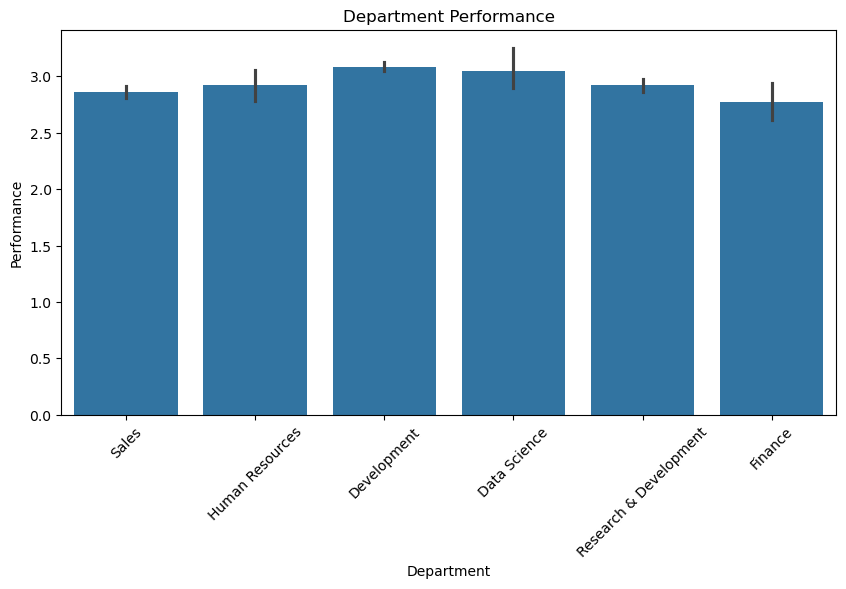

In [6]:
plot_bar_chart("EmpDepartment","PerformanceRating",xlabel="Department",ylabel="Performance",title="Department Performance",rot_=45)

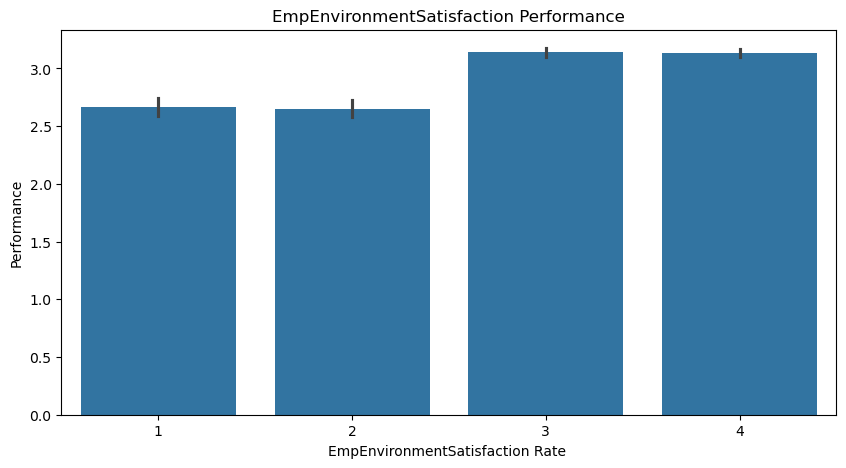

In [7]:
plot_bar_chart("EmpEnvironmentSatisfaction","PerformanceRating",xlabel="EmpEnvironmentSatisfaction Rate ",ylabel="Performance",title="EmpEnvironmentSatisfaction Performance")

Sales and finance department comapritively shows less performnce

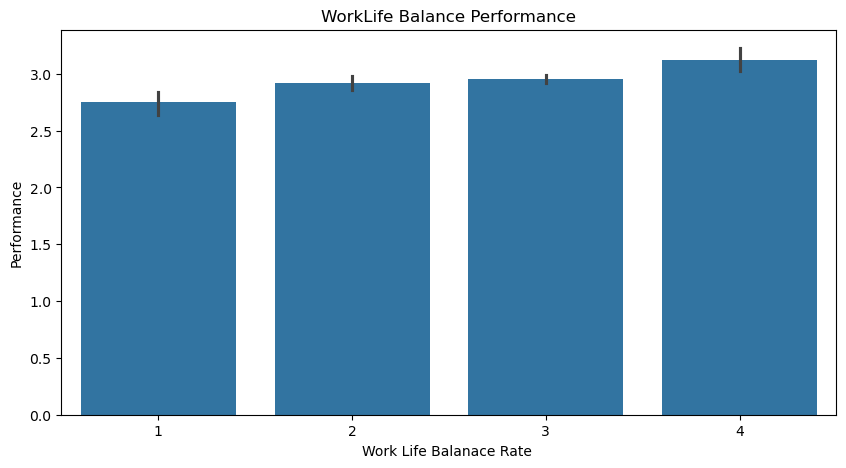

In [9]:
plot_bar_chart("EmpWorkLifeBalance","PerformanceRating",xlabel="Work Life Balanace Rate ",ylabel="Performance",title="WorkLife Balance Performance")

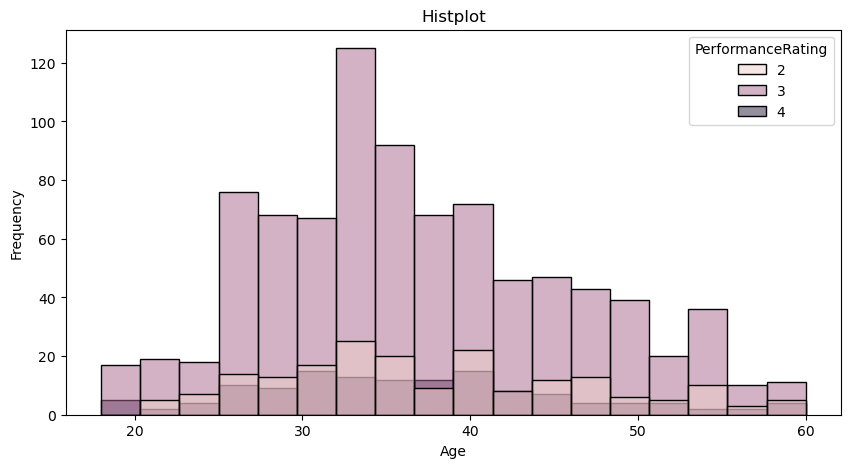

In [10]:
plot_hist_chart("Age",xlabelH="Age",ylabelH="Frequency")

# Feature importance

In [12]:
data_for_features=pd.read_excel("Processed_data.xlsx")
x_data=data_for_features.drop('PerformanceRating',axis=1)
y_data=data_for_features['PerformanceRating']

In [13]:
print(x_data.shape)
print(y_data.shape)

(1200, 26)
(1200,)


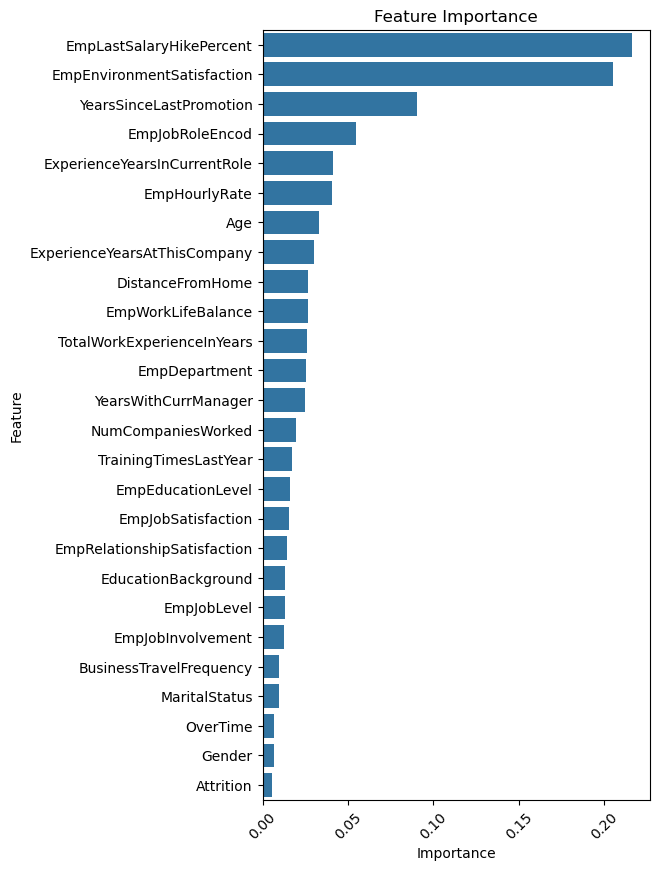

In [14]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_data,y_data)
feature_importance=RF.feature_importances_
feature_importance=pd.DataFrame({'Feature':x_data.columns,'Importance':feature_importance})
feature_importance=feature_importance.sort_values(by='Importance' ,ascending=False)

plt.figure(figsize=(5,10))
sns.barplot(x='Importance',y='Feature',data=feature_importance)
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

#print(feature_importance)

The main 3 factors affecting the performance ae
-Last salary hike percent
-Job environment satisfaction
-Promotion....